# **Understanding Data**

In [3]:
import pandas as pd
df=pd.read_csv('/content/IndianFlightdata - Sheet1.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64']).columns
print(categorical_cols)
numerical_cols

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')


Index(['Price'], dtype='object')

# ***univarient analysis***

countplot

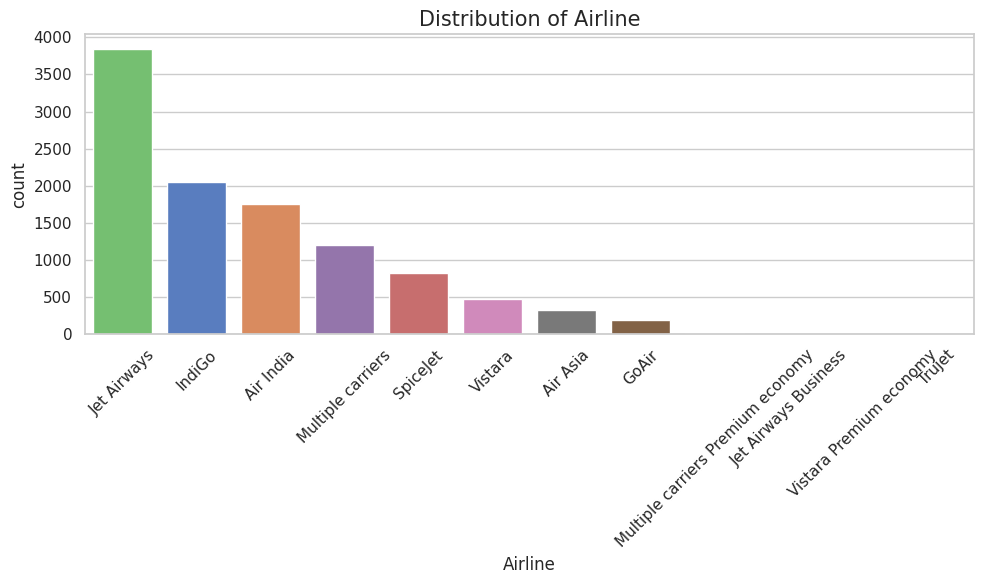

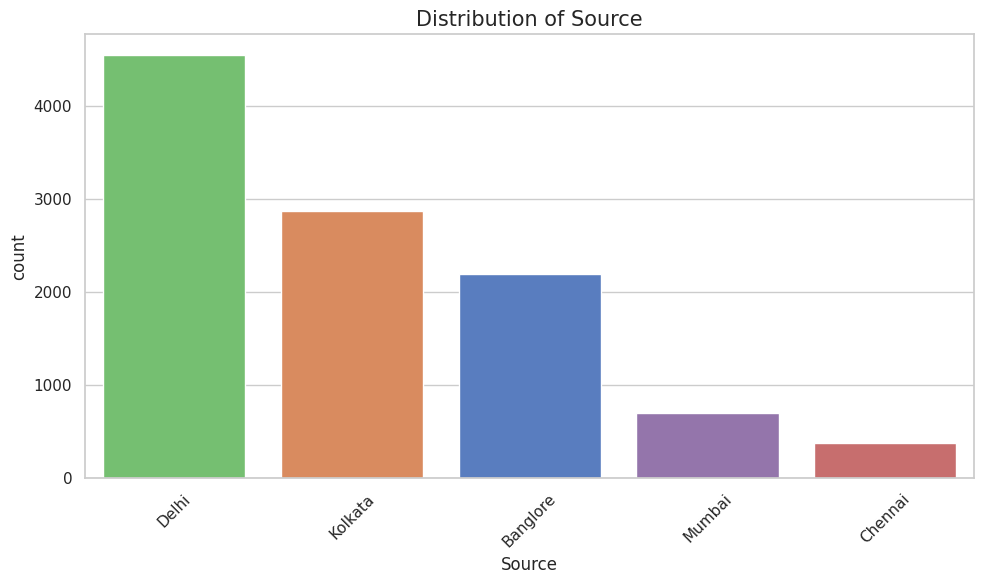

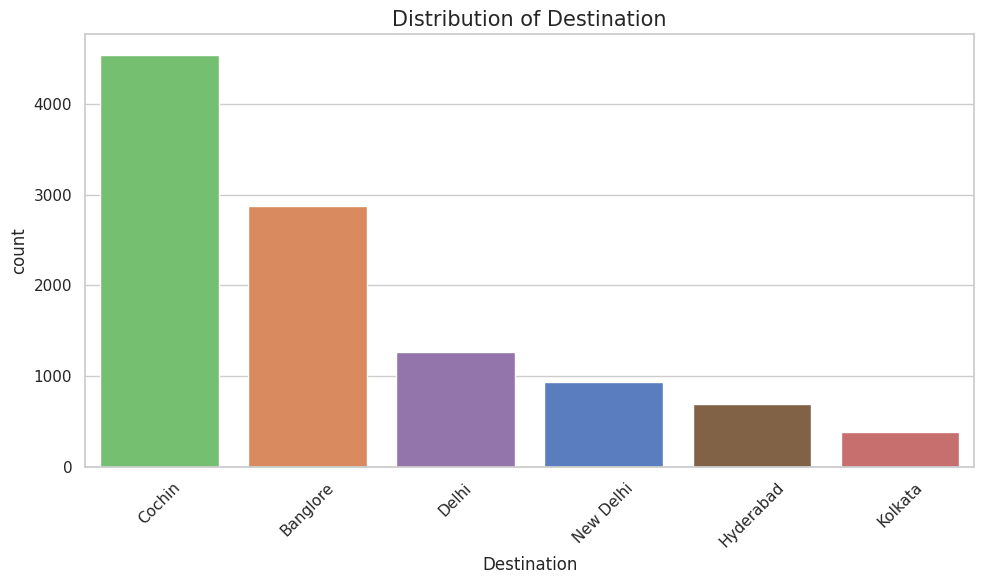

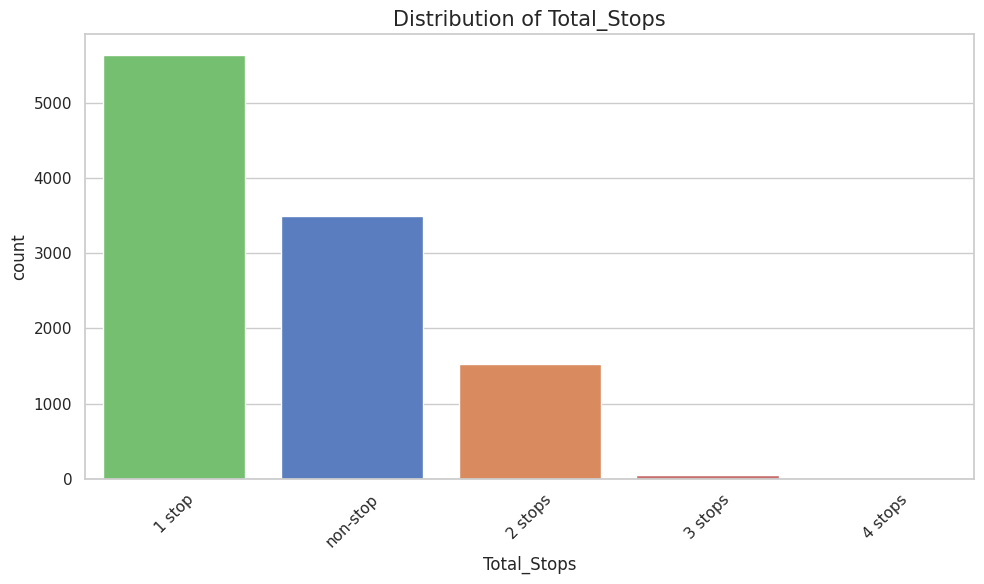

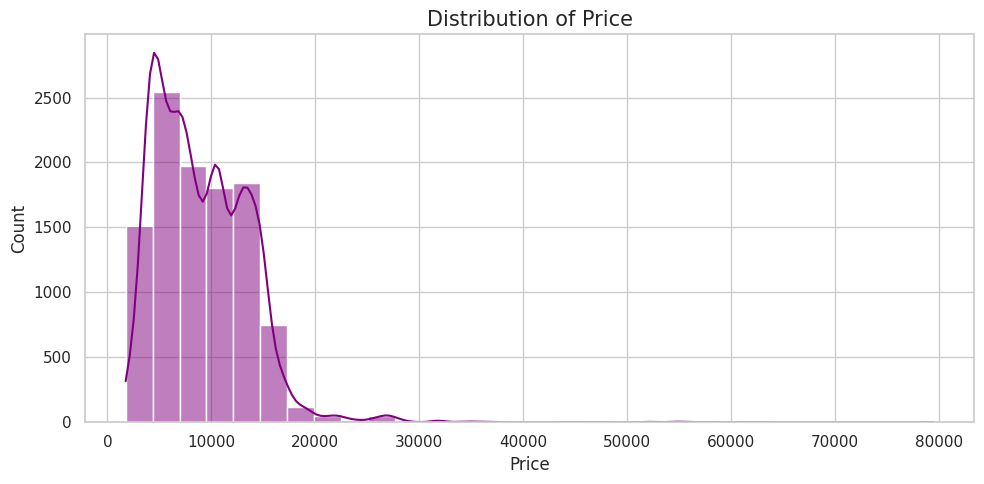

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
categorical_cols = ['Airline', 'Source', 'Destination', 'Total_Stops']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(
        data=df,
        x=col,
        hue=col,
        palette='muted',
        legend=False,
        order=df[col].value_counts().index
    )
    plt.title(f'Distribution of {col}', fontsize=15)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=col, kde=True, color='purple', bins=30)
    plt.title(f'Distribution of {col}', fontsize=15)
    plt.tight_layout()
    plt.show()

  box-plot

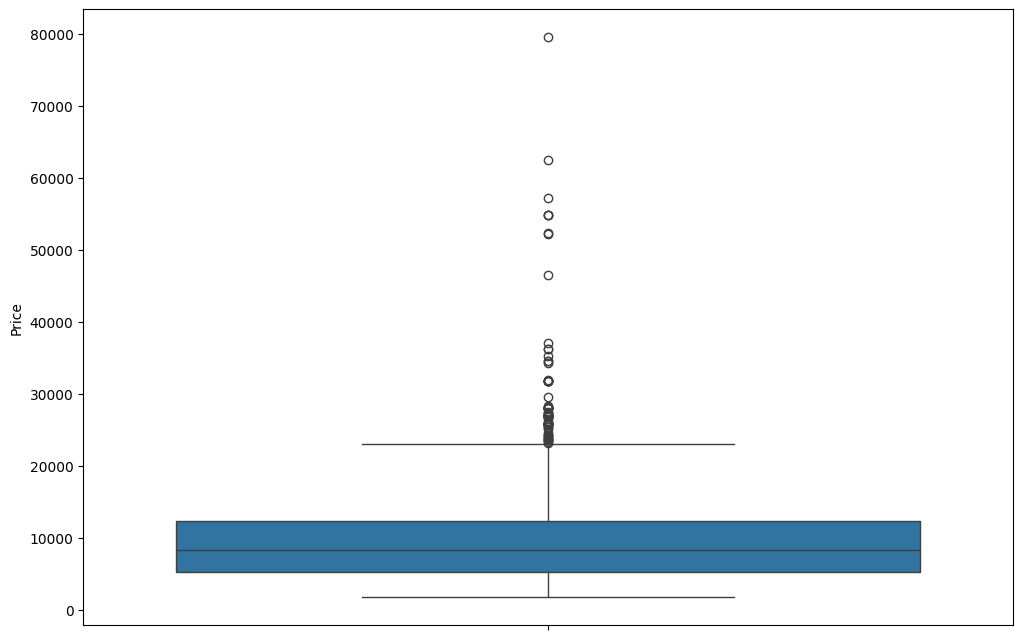

In [7]:
for col in numerical_cols:
  plt.figure(figsize=(12, 8))
  sns.boxplot(df[col])

## ***bivarient*** ***analysis***

/tmp/ipython-input-2142147163.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Total_Stops', y='Price', palette='muted')


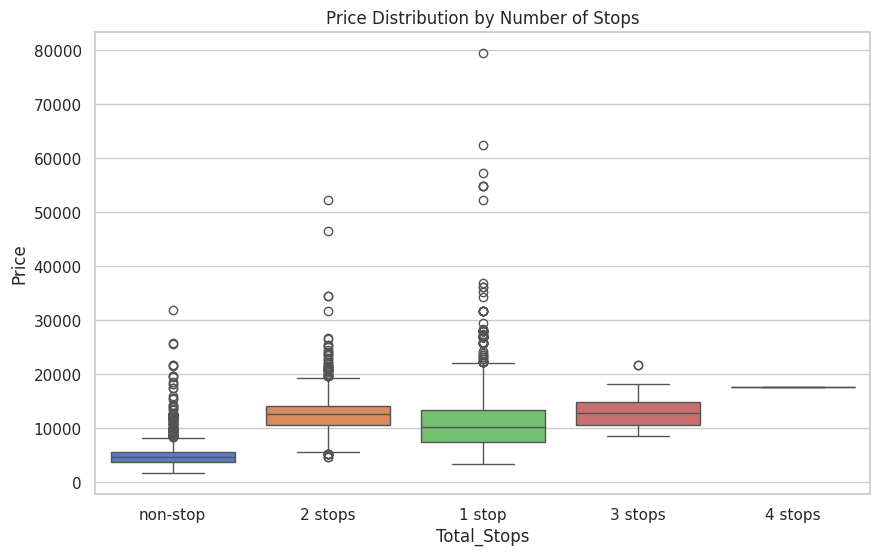

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Total_Stops', y='Price', palette='muted')
plt.title('Price Distribution by Number of Stops')
plt.show()

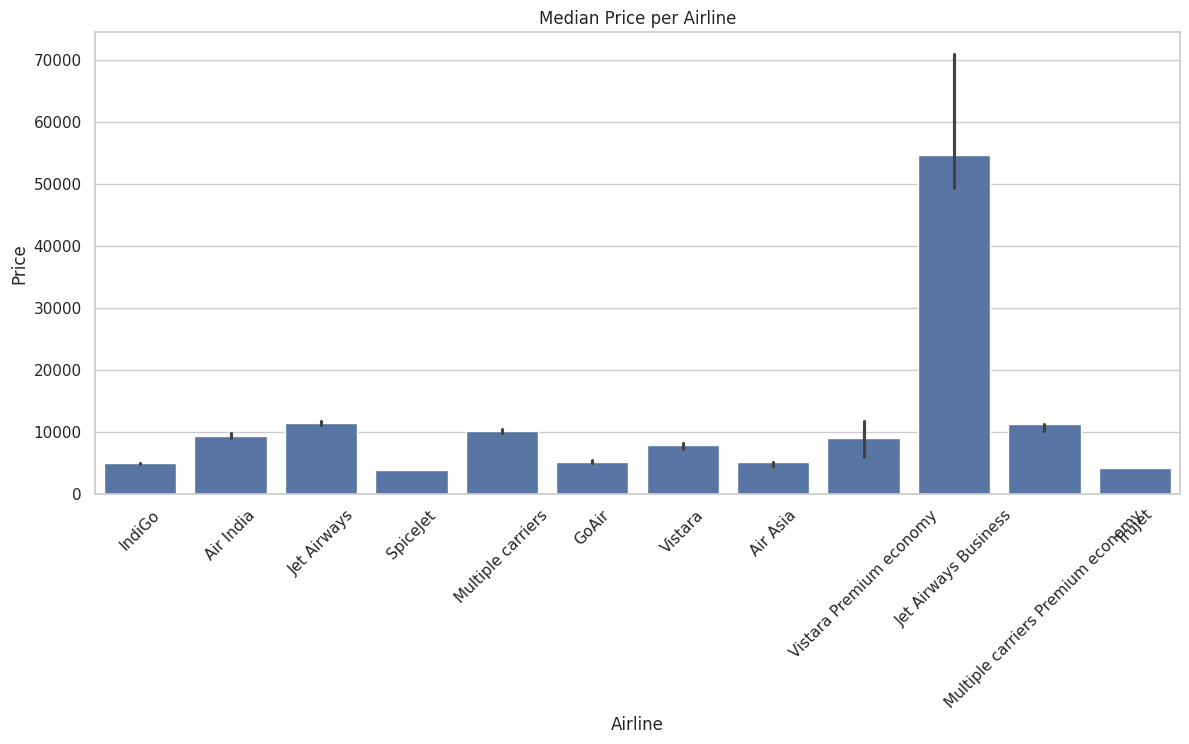

In [16]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='Airline', y='Price', estimator=np.median)
plt.xticks(rotation=45)
plt.title('Median Price per Airline')
plt.show()